<a href="https://colab.research.google.com/github/kelvinfoo123/Final-Year-Project/blob/main/Iris_Neural_Network_Mapper_(TensorFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import data**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

!pip install tensorflow 
import tensorflow.keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

%matplotlib inline 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv("Iris.csv")

## **Data preprocessing**

In [ ]:
df['Species'] = df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
df.drop(['Id'], axis = 1, inplace = True)

# Split X and y 
X = df.drop(['Species'], axis = 1).values
y = df['Species'].values 

# Train test split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Scale X 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

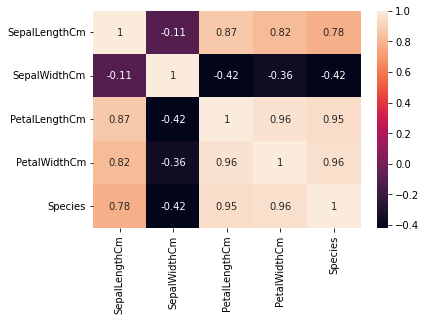

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
df_X_test = pd.DataFrame(X_test, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df_X_test['Species'] = pd.Series(y_test)
df_X_test['Species'] = df_X_test['Species'].map({0: 'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'})


df_X_test.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,0.310062,-0.495821,0.484037,-0.051440,Iris-versicolor
1,-0.172257,1.925630,-1.268512,-1.266709,Iris-setosa
2,2.239339,-0.980111,1.769240,1.433889,Iris-virginica
3,0.189483,-0.253676,0.367201,0.353650,Iris-versicolor
4,1.154121,-0.495821,0.542456,0.218620,Iris-versicolor


## **Build neural network**

In [ ]:
input_dim = 4 
output_dim = 3

model = Sequential()
model.add(Dense(128, input_dim = input_dim, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(output_dim, activation = 'sigmoid'))

In [ ]:
model.compile(loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(), optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 51ms/step - loss: 1.0429 - accuracy: 0.4286 - val_loss: 0.8826 - val_accuracy: 0.7333
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.8868 - accuracy: 0.7048 - val_loss: 0.7330 - val_accuracy: 0.7778
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.7534 - accuracy: 0.7905 - val_loss: 0.6224 - val_accuracy: 0.7778
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6527 - accuracy: 0.8095 - val_loss: 0.5435 - val_accuracy: 0.8000
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5748 - accuracy: 0.8286 - val_loss: 0.4872 - val_accuracy: 0.8222
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5143 - accuracy: 0.8286 - val_loss: 0.4452 - val_accuracy: 0.8222
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.4691 - accuracy: 0.8381 - val_loss: 0.4133 - val_accuracy: 0.8222
Epoch 8/100
4/4 [=====

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               640       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
_________________________________________________________________


## **Extract weights**

In [ ]:
from keras import Model 

layer_0 = 'dense_3'
layer_1 = 'dense_4'
layer_2 = 'dense_5'

intermediate_layer_model_0 = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_0).output)
intermediate_layer_model_1 = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_1).output)
intermediate_layer_model_2 = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_2).output)

intermediate_output_0 = intermediate_layer_model_0.predict(X_test)
intermediate_output_1 = intermediate_layer_model_1.predict(X_test)
intermediate_output_2 = intermediate_layer_model_2.predict(X_test)

2/2 [==============================] - 0s 4ms/step


## **Mapper algorithm**

In [ ]:
!pip install giotto-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.6/452.6 KB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.1/526.1 KB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.6 MB/s eta 0:00:00


In [ ]:
import gtda.graphs as gr
from gtda.pipeline import Pipeline
from gtda.plotting import plot_point_cloud, plot_heatmap
from gtda.graphs import KNeighborsGraph, GraphGeodesicDistance
from gtda.mapper import (
    CubicalCover,
    OneDimensionalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph)
from gtda.mapper import Eccentricity, Entropy
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

In [ ]:
filter_func = Eccentricity(metric = 'euclidean')
cover = CubicalCover(n_intervals = 10, overlap_frac = 0.5)
clusterer = DBSCAN(eps = 10, min_samples = 5, metric = 'euclidean') 
pipe_mapper = make_mapper_pipeline(filter_func = filter_func, cover = cover, clusterer = clusterer, verbose = False, n_jobs = 1)

In [ ]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_0, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

In [ ]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_1, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

In [ ]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_2, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

## **Zoom in on the branch of mapper of hidden layer**

In [ ]:
# Classify the nodes into four lists 

graph_1 = pipe_mapper.fit_transform(intermediate_output_1)
node_elements = graph_1.vs["node_elements"]

node_id_left = []
node_id_top = []
node_id_right = []
node_id_central = []

for node_id in [0, 1, 2, 4, 5, 6, 7, 8, 9]: 
  if node_id in [5, 7, 8]: 
    node_id_left.append(node_elements[node_id])
  if node_id in [0]: 
    node_id_top.append(node_elements[node_id])
  if node_id in [1, 2, 6, 9]: 
    node_id_right.append(node_elements[node_id])
  if node_id == 4: 
    node_id_central.append(node_elements[node_id])

In [ ]:
node_id_central

[array([ 5,  7,  8, 10, 11, 12, 13, 20, 21, 22, 24, 28, 29, 40])]

In [ ]:
node_id_left

[array([ 7, 24, 25, 35, 40]),
 array([16, 19, 23, 25, 26, 27, 35]),
 array([16, 19, 23, 26, 27])]

In [ ]:
node_id_right

[array([ 1, 11, 12, 13, 20, 22, 33, 34, 37, 44]),
 array([ 1, 14, 33, 34, 37, 38, 43, 44]),
 array([14, 30, 38, 43]),
 array([30])]

In [ ]:
node_id_top

[array([ 0,  3,  4,  5,  6,  8,  9, 10, 15, 17, 18, 21, 28, 29, 32, 36, 41,
        42])]

## **Analysis of data in each part**

In [ ]:
# Make dataframe 
df_left = df_X_test.iloc[[7, 24, 25, 35, 40, 16, 19, 23, 25, 26, 27, 35]]
df_central = df_X_test.iloc[[5,  7,  8, 10, 11, 12, 13, 20, 21, 22, 24, 28, 29, 40]]
df_right = df_X_test.iloc[[11, 12, 13, 20, 22, 14, 30, 1, 33, 34, 37, 38, 43, 44]]
df_top = df_X_test.iloc[[0,  3,  4,  5,  6,  8,  9, 10, 15, 17, 18, 21, 28, 29, 32, 36, 41, 42]] 

In [ ]:
df_left

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
7,1.274701,0.230614,0.717711,1.433889,Iris-virginica
24,2.480498,1.925630,1.477149,1.028800,Iris-virginica
25,1.033541,-0.011531,0.776129,1.433889,Iris-virginica
35,0.551222,-1.222256,0.659292,0.893770,Iris-virginica
40,-0.051677,-0.737966,0.717711,0.893770,Iris-virginica
16,0.792381,-0.011531,1.126639,1.298859,Iris-virginica
19,0.671802,-0.495821,1.009802,1.298859,Iris-virginica
23,0.671802,-0.495821,1.009802,1.163830,Iris-virginica
25,1.033541,-0.011531,0.776129,1.433889,Iris-virginica
26,1.033541,-1.222256,1.126639,0.758740,Iris-virginica


In [ ]:
df_right

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
11,-1.257475,-0.011531,-1.443767,-1.536769,Iris-setosa
12,-0.413416,1.199195,-1.502185,-1.401739,Iris-setosa
13,-1.136895,0.230614,-1.385349,-1.536769,Iris-setosa
20,-1.378055,0.472760,-1.326930,-1.401739,Iris-setosa
22,-1.016315,0.957050,-1.326930,-1.131680,Iris-setosa
14,-0.895736,1.925630,-1.385349,-1.266709,Iris-setosa
30,-1.498634,1.441340,-1.677440,-1.401739,Iris-setosa
1,-0.172257,1.925630,-1.268512,-1.266709,Iris-setosa
33,-1.257475,0.957050,-1.326930,-1.401739,Iris-setosa
34,-1.739794,0.472760,-1.502185,-1.401739,Iris-setosa


In [ ]:
df_central

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
5,-0.533996,0.957050,-1.385349,-1.131680,Iris-setosa
7,1.274701,0.230614,0.717711,1.433889,Iris-virginica
8,0.430642,-1.948692,0.367201,0.353650,Iris-versicolor
10,0.792381,0.472760,0.717711,1.028800,Iris-virginica
11,-1.257475,-0.011531,-1.443767,-1.536769,Iris-setosa
12,-0.413416,1.199195,-1.502185,-1.401739,Iris-setosa
13,-1.136895,0.230614,-1.385349,-1.536769,Iris-setosa
20,-1.378055,0.472760,-1.326930,-1.401739,Iris-setosa
21,0.310062,-0.011531,0.600874,0.758740,Iris-virginica
22,-1.016315,0.957050,-1.326930,-1.131680,Iris-setosa


In [ ]:
df_top

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,0.310062,-0.495821,0.484037,-0.051440,Iris-versicolor
3,0.189483,-0.253676,0.367201,0.353650,Iris-versicolor
4,1.154121,-0.495821,0.542456,0.218620,Iris-versicolor
5,-0.533996,0.957050,-1.385349,-1.131680,Iris-setosa
6,-0.292837,-0.253676,-0.158564,0.083590,Iris-versicolor
8,0.430642,-1.948692,0.367201,0.353650,Iris-versicolor
9,-0.051677,-0.737966,0.016691,-0.051440,Iris-versicolor
10,0.792381,0.472760,0.717711,1.028800,Iris-virginica
15,0.551222,0.714905,0.484037,0.488680,Iris-versicolor
17,-0.292837,-1.222256,0.016691,-0.186470,Iris-versicolor


Branches seperate the species. Central and top are still not well-classified. 

##**Graphical analysis of central and top**

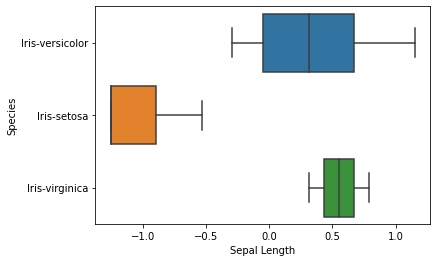

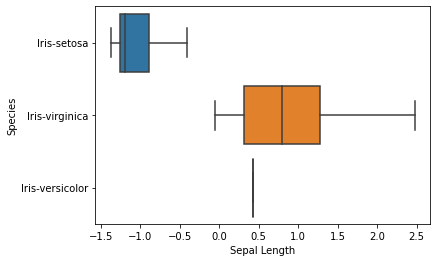

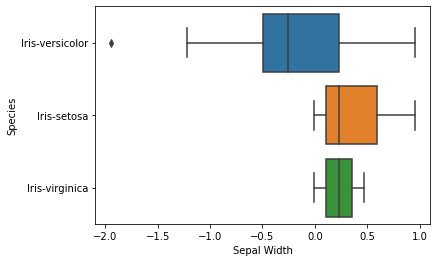

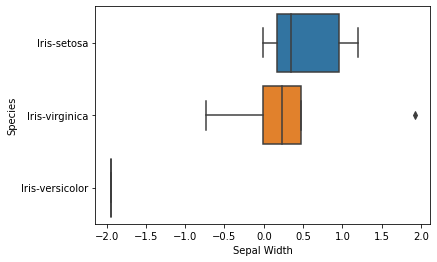

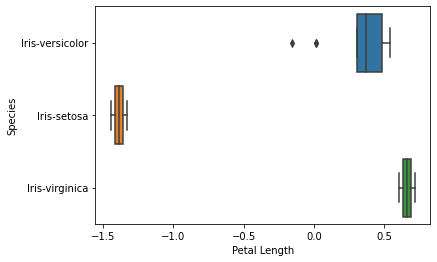

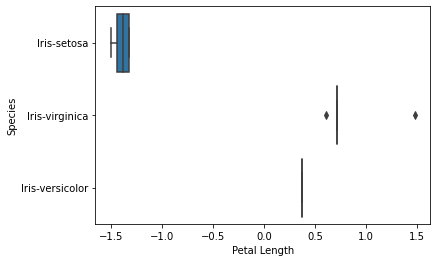

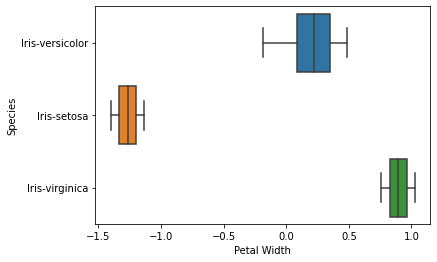

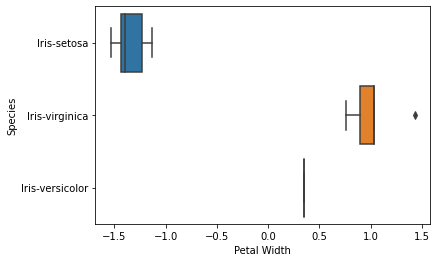

In [ ]:
for col in ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']: 
  for data in [df_top, df_central]: 
    sns.boxplot(x = col, y = 'Species', data = data)
    plt.show()

Difference in distribution of sepal width